In [1]:
import numpy as np
from astropy.coordinates import SkyCoord
from astropy.io import fits
from math import log

In [2]:
# apro il catalogo redmapper

name = 'redmapper.fit'
rm_cat = fits.open(name)
rm_cat.info()
rm_cat_hdr = rm_cat[1].header
rm_cat_hdr

Filename: redmapper.fit
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1                1 BinTableHDU    155   53610R x 69C   [J, D, D, 4E, 4E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, 3E, 3E, 4E, E, E, E, I, E, E, E, E, 21E, 21E, I, E, D, D, E, E, E, E, E, E, E, I, I, 5D, 5D, 5K, 5E, 5E, 5E, 5E, 5E, 5E, E, 5E, 5E, E, E, E, E, E, E, E, E, I]   


XTENSION= 'BINTABLE'           /Binary table written by MWRFITS v1.11b          
BITPIX  =                    8 /Required value                                  
NAXIS   =                    2 /Required value                                  
NAXIS1  =                  730 /Number of bytes per row                         
NAXIS2  =                53610 /Number of rows                                  
PCOUNT  =                    0 /Normally 0 (no varying arrays)                  
GCOUNT  =                    1 /Required value                                  
TFIELDS =                   69 /Number of columns in table                      
COMMENT                                                                         
COMMENT  *** End of mandatory fields ***                                        
COMMENT                                                                         
COMMENT                                                                         
COMMENT  *** Column names **

In [3]:
rm_cat_data = rm_cat[1].data
rm_cat_data

FITS_rec([(      1,  43.56457918, -58.952959  , [20.05658 , 18.19134 , 17.57313 , 17.211803], [0.00619253, 0.00304374, 0.00317005, 0.00326074], 17.211803, 0.00326074, 0.41990262, 0.01982187,  2.0704932, -1., -1., 0.4450967 , 0.4281561 , 221.67424 ,  5.712534 , 192.14061  , 5.1811213, 1.1725816, 1.0148627, 0.01767721, 0., [1.7302246 , 0.58349437, 0.33943343], [1.0073867e-03, 2.6192438e-04, 2.5456835e-04], [8.5430458e-04, 1.2692463e-04, 1.1766128e-04, 0.0000000e+00],  1.4507834, 0.42608216, 0.00933732,  2, 0.02102081,  4.6805881e+02, -1.1185727 , 466.94025  , [0.37455446, 0.37970722, 0.38486   , 0.39001277, 0.39516553, 0.4003183 , 0.4054711 , 0.41062385, 0.4157766 , 0.4209294 , 0.42608216, 0.43123493, 0.4363877 , 0.44154048, 0.44669324, 0.45184603, 0.4569988 , 0.46215156, 0.46730432, 0.47245708, 0.4776099 ], [1.43873685e-05, 2.35601416e-04, 2.87270802e-03, 2.61925478e-02, 1.99696377e-01, 1.00479269e+00, 3.79465842e+00, 1.07529116e+01, 2.28283272e+01, 3.62383537e+01, 4.29141617e+01, 3.701

In [4]:
# ra redmapper

i=0
RA=rm_cat_data["RA"]
RA

array([ 43.56457918,  83.23190197, 347.09255021, ..., 323.77200839,
        20.75242753,  19.87522769])

In [5]:
# dec redmapper

i=0
DEC=rm_cat_data["DEC"]
DEC

array([-58.952959  , -37.02668944,  -2.19213689, ...,  -2.23386689,
        -3.30178805,  -7.00573057])

In [6]:
# redshift redmapper

i=0
Z=rm_cat_data["Z_LAMBDA"]
Z

array([0.42608216, 0.28333774, 0.29250583, ..., 0.9030307 , 0.93646556,
       0.93619096], dtype=float32)

In [7]:
# ricchezza redmapper

i=0
RICH=rm_cat_data["LAMBDA_CHISQ"]
RICH

array([221.67424 , 199.4325  , 163.5833  , ...,  20.32384 ,  20.644194,
        20.32384 ], dtype=float32)

In [8]:
# apro il catalogo SPT

name2 = 'spt.fits'
spt_cat = fits.open(name2)
spt_cat.info()
spt_cat_hdr = spt_cat[1].header
spt_cat_hdr

Filename: spt.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1                1 BinTableHDU     63   470R x 23C   [16A, D, D, 11A, E, E, E, E, I, E, E, 50A, E, E, E, E, E, E, E, E, 38A, 19A, 29A]   


XTENSION= 'BINTABLE'           /Binary table written by MWRFITS v1.6            
BITPIX  =                    8 /Required value                                  
NAXIS   =                    2 /Required value                                  
NAXIS1  =                  237 /Number of bytes per row                         
NAXIS2  =                  470 /Number of rows                                  
PCOUNT  =                    0 /Normally 0 (no varying arrays)                  
GCOUNT  =                    1 /Required value                                  
TFIELDS =                   23 /Number of columns in table                      
COMMENT                                                                         
COMMENT  *** End of mandatory fields ***                                        
COMMENT                                                                         
COMMENT                                                                         
COMMENT  *** Column names **

In [9]:
spt_cat_data = spt_cat[1].data
spt_cat_data

FITS_rec([('SPT-CLJ0000-2518', 7.2338357e-02, -25.303935, ' ra1hdec-25',  5.073545 , 1.5 , 0.        , 0.        , 0, 0., 0.00000000e+00, '                                                 -',  0.   , 0.   , 0.   ,   0.       ,  0.       , 0., 0., 1., '', '', ''),
          ('SPT-CLJ0005-3751', 1.4383179e+00, -37.854369, ' ra1hdec-35',  6.336327 , 0.75, 0.48295808, 0.00724159, 0, 4., 6.10079558e-04, '                                                 -',  5.419, 0.887, 0.887,  86.40839  ,  4.7352147, 0., 1., 3., '', '', ''),
          ('SPT-CLJ0005-3443', 1.4876514e+00, -34.719271, ' ra1hdec-35',  5.514429 , 2.  , 0.114     , 0.        , 1, 9., 1.94518128e-04, '                                                 -',  5.325, 0.903, 1.005, 105.385574 ,  4.646943 , 0., 0., 8., '                   1989ApJS...70....1A', '', ''),
          ('SPT-CLJ0012-3537', 3.0433397e+00, -35.622635, ' ra1hdec-35',  5.261003 , 2.25, 0.6881156 , 0.01527248, 0, 4., 1.19363400e-03, '                               

In [10]:
#ra spt 

i=0
RA_SPT=spt_cat_data["RA"]
RA_SPT

array([7.2338357e-02, 1.4383179e+00, 1.4876514e+00, 3.0433397e+00,
       3.1111835e+00, 3.5726598e+00, 3.6931852e+00, 5.1730618e+00,
       7.0110953e+00, 8.8608249e+00, 1.0526915e+01, 1.0613344e+01,
       1.0845174e+01, 1.1605618e+01, 1.2293526e+01, 1.3827032e+01,
       1.4877369e+01, 1.5289812e+01, 1.5419484e+01, 1.6390377e+01,
       1.6431900e+01, 1.8675313e+01, 1.9537643e+01, 2.5025542e+01,
       2.7904172e+01, 2.8141083e+01, 2.8241617e+01, 2.9755414e+01,
       2.9839829e+01, 3.0069415e+01, 3.0196630e+01, 3.0470905e+01,
       3.0541871e+01, 3.0788699e+01, 3.1151721e+01, 3.1341080e+01,
       3.1514197e+01, 3.3515871e+01, 3.4148573e+01, 3.4372938e+01,
       3.4384136e+01, 3.4578576e+01, 3.4942290e+01, 3.5021367e+01,
       3.6003282e+01, 3.9017239e+01, 3.9325811e+01, 3.9411365e+01,
       3.9580710e+01, 3.9681555e+01, 4.0303224e+01, 4.0352423e+01,
       4.0450678e+01, 4.1169343e+01, 4.1375081e+01, 4.1615061e+01,
       4.2266193e+01, 4.3110343e+01, 4.3310566e+01, 4.3329767e

In [11]:
# dec spt

i=0
DEC_SPT=spt_cat_data["DEC"]
DEC_SPT

array([-25.303935, -37.854369, -34.719271, -35.622635, -33.778217,
       -30.383121, -20.408659, -25.727583, -26.820532, -20.26354 ,
       -28.52213 , -38.151329, -20.622587, -39.199719, -24.681206,
       -37.661734, -31.63189 , -31.151422, -38.668575, -24.654122,
       -30.067905, -28.341806, -26.970812, -34.17556 , -28.996865,
       -28.890241, -35.409919, -34.224749, -33.527036, -24.914561,
       -31.115521, -23.422542, -30.463774, -20.286681, -29.068925,
       -28.579778, -34.41324 , -27.403833, -26.160453, -27.827391,
       -32.006317, -31.705436, -32.143504, -28.417129, -39.359443,
       -39.030845, -28.116851, -37.722261, -26.262482, -34.272644,
       -39.275647, -28.659515, -28.095066, -30.194079, -27.16263 ,
       -20.555548, -39.264277, -21.0106  , -38.310403, -32.790456,
       -24.223025, -34.917631, -23.432479, -22.150943, -34.830894,
       -34.894289, -20.073536, -36.297239, -22.681868, -28.095196,
       -33.107295, -36.945396, -38.064536, -32.49623 , -28.669

In [12]:
# redshift spt

i=0
Z_SPT=spt_cat_data["REDSHIFT"]
Z_SPT

array([0.        , 0.48295808, 0.114     , 0.6881156 , 0.67583644,
       0.307     , 0.317     , 0.141     , 0.7477372 , 0.352     ,
       0.1086    , 0.21966   , 0.2924    , 0.59376687, 0.52734804,
       0.        , 0.        , 0.        , 0.25757086, 0.22929814,
       0.        , 0.43099722, 0.2275    , 0.40016618, 0.39155936,
       0.413     , 0.93925875, 0.413     , 0.4010333 , 0.7198951 ,
       0.9921393 , 0.        , 0.48415172, 0.4400637 , 0.        ,
       0.87967396, 0.6348632 , 0.80812174, 0.790878  , 0.99613   ,
       0.3543809 , 0.2747654 , 0.60688525, 0.        , 0.49102753,
       0.9395654 , 0.50038975, 0.5108067 , 0.4457033 , 0.6509173 ,
       1.026627  , 0.238465  , 0.33805928, 1.37      , 0.710252  ,
       0.31729633, 0.6604971 , 0.7118231 , 0.44401142, 0.974191  ,
       0.9330069 , 0.61027306, 0.50489   , 0.322     , 0.63230246,
       0.35358623, 0.7206524 , 0.48681116, 0.52510035, 0.2935387 ,
       0.752     , 0.2192    , 0.        , 0.52990943, 0.2534 

In [13]:
# ricchezza spt

i=0
RICH_SPT=spt_cat_data["LAMBDA_CHISQ"]
RICH_SPT
len(RICH_SPT)

470

In [14]:
# confronto coordinate
# 10 minuti d'arco = 0.17 gradi

import astropy.units as u
from astropy.coordinates import SkyCoord
from math import radians

coord_rm = SkyCoord(ra=RA*u.degree, dec=DEC*u.degree)
coord_spt = SkyCoord(ra=RA_SPT*u.degree, dec=DEC_SPT*u.degree)
idx, d2d, d3d = coord_spt.match_to_catalog_sky(coord_rm)
#print(coord_rm.shape)
#print(coord_spt.shape)
#print(d2d)
#print(idx)
d2d_rad = d2d.to(u.rad)

lim_rad=radians(0.17)
dist_ang=[]  # valori espressi in radianti
delta_Z=[]
Z_medio=[]
n=0
i=0
while (i<len(d2d)):
    if d2d_rad[i]<= lim_rad*u.rad:
        diff_Z=abs(Z_SPT[i]-Z[idx[i]])
        if diff_Z<=0.1:
            Z_med=0.5*(Z[idx[i]]+Z_SPT[i])
            print(n,i,idx[i],d2d_rad[i], diff_Z)
            n=n+1
            dist_ang.append(d2d_rad[i])
            delta_Z.append(diff_Z)
            Z_medio.append(Z_med)
    i=i+1
print(dist_ang)

0 1 223 0.000243002rad 0.0024006069
1 2 83 0.000277847rad 0.00524275
2 3 2572 0.000137278rad 0.0028526783
3 4 808 0.000180306rad 0.004207015
4 8 1286 8.89704e-05rad 0.0021291971
5 10 214 0.000282608rad 0.0042304695
6 11 263 5.54747e-05rad 0.0120575875
7 13 279 0.000238022rad 0.0020014048
8 14 73 5.56002e-05rad 0.00015348196
9 18 1360 0.000182917rad 5.8472157e-05
10 19 161 0.000515624rad 0.00079758465
11 21 52 0.000158262rad 0.0008060634
12 22 189 0.000135222rad 0.005052313
13 23 1316 3.25215e-05rad 0.0011696815
14 24 50 0.000157346rad 0.0001899302
15 25 42 0.000246196rad 0.00782612
16 26 4440 0.000125715rad 0.0018857718
17 27 67 0.00020158rad 0.008671761
18 29 85 1.98253e-05rad 0.00029945374
19 32 271 7.80403e-05rad 0.0005531013
20 33 29 0.000144091rad 0.0014213622
21 36 3369 5.03972e-05rad 0.0005450845
22 37 6142 8.46539e-05rad 0.0009952188
23 38 7110 6.67559e-05rad 0.0028184056
24 40 1206 5.18682e-05rad 0.00024020672
25 41 25 5.46145e-05rad 6.622076e-05
26 42 5725 0.000158179rad 0.00

234 408 758 0.000196866rad 0.004118383
235 410 5926 0.000316457rad 0.0016386062
236 412 7338 0.000448497rad 0.019442976
237 413 353 0.000112573rad 0.00056681037
238 414 3171 0.00014289rad 0.0004067421
239 415 27811 0.0014309rad 0.02863866
240 416 35345 0.000382145rad 0.03085503
241 417 40210 0.000144141rad 0.044889987
242 418 32372 0.000255589rad 0.012017131
243 419 253 9.35439e-05rad 0.00018167496
244 420 3362 3.89107e-05rad 0.0002335906
245 421 3421 0.000248204rad 0.0029231906
246 422 36923 0.000182638rad 0.043869913
247 423 4289 0.000119888rad 0.0009843707
248 424 1474 0.000191431rad 0.014683425
249 425 269 0.00046405rad 0.00069880486
250 426 12172 0.000524866rad 0.006311029
251 427 2159 0.00068658rad 0.0055120885
252 428 1201 0.000482981rad 0.0025393367
253 430 25813 0.000309935rad 0.0030035377
254 431 4223 0.000217149rad 0.0006199479
255 432 177 0.000113775rad 0.0005739629
[<Angle 0.000243 rad>, <Angle 0.00027785 rad>, <Angle 0.00013728 rad>, <Angle 0.00018031 rad>, <Angle 8.89703

In [15]:
from astropy.cosmology import FlatLambdaCDM
cosmo = FlatLambdaCDM(H0=67.7, Om0=0.31)
cosmo

FlatLambdaCDM(H0=67.7 km / (Mpc s), Om0=0.31, Tcmb0=0 K, Neff=3.04, m_nu=None, Ob0=None)

In [16]:
dist_Mpc=cosmo.angular_diameter_distance(Z_medio)
dist_Mpc=dist_Mpc/(1.0*u.Mpc)
print(dist_Mpc)

[1275.18270594  449.70093754 1505.49031553 1497.65118725 1554.99078954
  429.82441798  771.20456556 1412.16087927 1333.9273924   850.68132399
  779.48376088 1195.13056035  782.37487348 1143.95824333 1128.06310286
 1158.2350017  1672.33120613 1157.51738928 1533.65900775 1274.77842769
 1207.82934798 1456.84486699 1599.0067416  1588.0528619  1059.11795982
  891.20255967 1427.14665695 1286.15854737 1667.7438363  1297.68652388
 1311.21998462 1219.73392963  805.0095011  1071.70059847 1524.73266967
 1480.74080847 1668.09195232 1431.4625108  1303.87427619  972.64922391
 1453.82010985 1057.12985152 1537.01281033 1278.90959176 1331.74566186
  759.76268605 1337.62659758  839.04521249 1555.65646949 1344.80705372
 1562.47886422 1449.47686623 1408.37212548 1236.77043971 1164.65098476
  939.89959261 1401.67213838 1668.95454863 1673.12553993 1626.71596556
  665.56320173 1605.16464614 1615.35809381 1137.31139616 1591.78359832
 1618.88196305 1664.83876023 1595.73492302 1393.68415373 1046.362937
 1625.97

In [17]:
# calcolo distanza fisica tra i centri

i=0
dist_centri=[]
while (i<len(dist_Mpc)):
    dim = dist_ang[i]*dist_Mpc[i]/(1.0*u.rad)
    dist_centri.append(dim)
    i=i+1
dist_centri

[<Quantity 0.30987156>,
 <Quantity 0.12494801>,
 <Quantity 0.20667022>,
 <Quantity 0.27003615>,
 <Quantity 0.13834808>,
 <Quantity 0.12147178>,
 <Quantity 0.0427823>,
 <Quantity 0.33612596>,
 <Quantity 0.07416662>,
 <Quantity 0.15560422>,
 <Quantity 0.40192031>,
 <Quantity 0.18914358>,
 <Quantity 0.10579392>,
 <Quantity 0.03720326>,
 <Quantity 0.17749615>,
 <Quantity 0.28515306>,
 <Quantity 0.21023697>,
 <Quantity 0.23333195>,
 <Quantity 0.03040521>,
 <Quantity 0.09948405>,
 <Quantity 0.17403728>,
 <Quantity 0.07342088>,
 <Quantity 0.13536214>,
 <Quantity 0.1060119>,
 <Quantity 0.05493453>,
 <Quantity 0.0486726>,
 <Quantity 0.22574397>,
 <Quantity 0.06317749>,
 <Quantity 0.39026677>,
 <Quantity 0.1074866>,
 <Quantity 0.14646281>,
 <Quantity 0.14390518>,
 <Quantity 0.19607914>,
 <Quantity 1.8586396>,
 <Quantity 0.33433146>,
 <Quantity 0.18095992>,
 <Quantity 1.32361352>,
 <Quantity 0.13149874>,
 <Quantity 0.07008674>,
 <Quantity 0.60210063>,
 <Quantity 0.03115554>,
 <Quantity 0.04427774

In [18]:
# maximum likelihood
# assumo distribuzione di Rayleigh per la distanza tra i centri

# parametro della distribuzione da vincolare: sigma2
# definisco funzione loglike

n=len(dist_centri)
def loglike(sigma2,dist_centri):
    ln_likelihood = (np.sum(np.log(dist_centri)))-(n*log(sigma2))-(1.0/(2.0*sigma2))*(np.sum(dist_centri**2))
    return (ln_likelihood)
dist_centri=np.array(dist_centri)

In [19]:
# stima massimizzando il loglike rispetto a sigma2
# lo uso come valore di partenza per emcee

sigma2=(np.sum(dist_centri))/(2*len(dist_centri))
print(sigma2)

0.18120807087976293


0.007056481115942925 4.696565527409676


Text(0, 0.5, 'Frequenza')

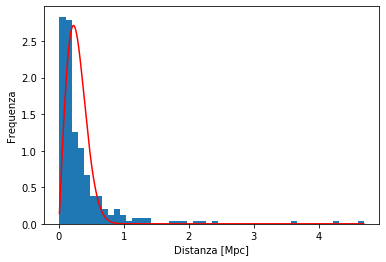

In [20]:
from matplotlib import pyplot as plt
import math
import numpy as np

plt.hist(dist_centri,density=True,bins=50)  #density=True mi normalizza l'istogramma
minimo=min(dist_centri)
massimo=max(dist_centri)
print(minimo,massimo)
def rayleigh(x):
    return(x/0.05)*math.exp(-(x**2)/(2*0.05))  #rayleigh è normlizzata
rayleigh2=np.vectorize(rayleigh)
x=np.linspace(minimo,massimo,10000,endpoint=True)
y=rayleigh2(x)
plt.plot(x, y, color='red',linestyle='-')
plt.xlabel('Distanza [Mpc]')
plt.ylabel('Frequenza')

In [21]:
def log_prior(sigma2):
    if sigma2 > 0.0:
        return 0.0
    return -np.inf

In [22]:
def log_posterior(sigma2,dist_centri):
    lpr=log_prior(sigma2)
    if not np.isfinite(lpr):
        return -np.inf
    llk=loglike(sigma2,dist_centri)
    lpost = lpr + llk
    return lpost, lpr, llk

In [23]:
import emcee

pos = 0.18 + 1e-3 * np.random.randn(16,1)
nwalkers, ndim = pos.shape

sampler = emcee.EnsembleSampler(nwalkers, ndim, log_posterior, args=[dist_centri])
sampler.run_mcmc(pos,2000,progress=True);

100%|██████████| 2000/2000 [00:10<00:00, 186.09it/s]


(2000, 16, 1)


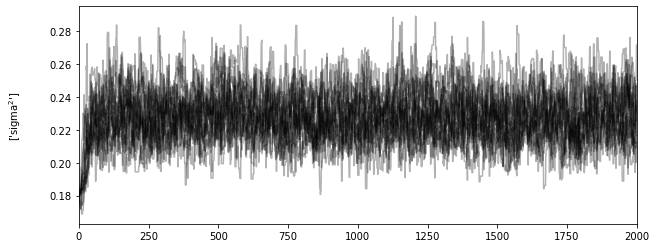

In [24]:
fig, axes = plt.subplots(1, figsize=(10, 4), sharex=True)
samples = sampler.get_chain()
print(samples.shape)
label = ['sigma$^2$']
axes.plot(samples[:, :, 0], "k", alpha=0.3)
axes.set_xlim(0, len(samples))
axes.set_ylabel(label)
axes.yaxis.set_label_coords(-0.1, 0.5)


In [25]:
flat_samples = sampler.get_chain(discard=100, flat=True)
flat_blob = sampler.get_blobs(flat=True,discard=100)

print(flat_samples.shape,flat_blob.shape)

Max_likelihood=np.argmax(flat_blob[:,1])
print(flat_samples[Max_likelihood,:])

(30400, 1) (30400, 2)
[0.2265441]


In [26]:
def rayleigh2(parametri, x):
    sigma0, P0, delta_sigma = parametri
    sigma1=sigma0+delta_sigma
    return(P0*x/sigma0*np.exp(-(x**2)/(2*sigma0))+(1-P0)*x/(sigma1)*np.exp(-(x**2)/(2*sigma1))) 

In [27]:
def loglike2(parametri,dist_centri):
    ln_likelihood2 = np.sum(np.log(rayleigh2(parametri, dist_centri)))
    return (ln_likelihood2)

In [28]:
def log_prior2(parametri):
    sigma0, P0, delta_sigma = parametri
    if sigma0 > 0.0 and delta_sigma > 0.0 and 0.0 <= P0 <= 1.0:
        return 0.0
    return -np.inf

In [29]:
def log_posterior2(parametri,dist_centri):
    lpr2=log_prior2(parametri)
    if not np.isfinite(lpr2):
        return -np.inf, -np.inf, -np.inf
    llk2=loglike2(parametri,dist_centri)
    lpost2 = lpr2 + llk2
    return lpost2, lpr2, llk2

In [30]:
import emcee

pos = [0.5, 0.5, 0.5] + 1e-2 * np.random.randn(16,3)
nwalkers, ndim = pos.shape

sampler = emcee.EnsembleSampler(nwalkers, ndim, log_posterior2, args=[dist_centri])
sampler.run_mcmc(pos,2000,progress=True);

100%|██████████| 2000/2000 [00:16<00:00, 123.21it/s]


(2000, 16, 3)


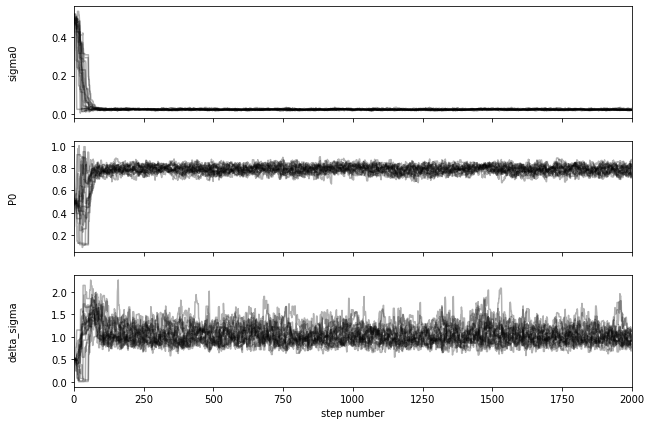

In [31]:
fig, axes = plt.subplots(3, figsize=(10, 7), sharex=True)
samples = sampler.get_chain()
print(samples.shape)
labels = ["sigma0", "P0", "delta_sigma"]
for i in range(ndim):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)

axes[-1].set_xlabel("step number");

In [32]:
flat_samples = sampler.get_chain(discard=100, flat=True)
flat_blob = sampler.get_blobs(flat=True,discard=100)

print(flat_samples.shape, flat_blob.shape)

Max_likelihood=np.argmax(flat_blob[:,1])
print(flat_samples[Max_likelihood,:])

(30400, 3) (30400, 2)
[0.02232897 0.78925157 0.97283277]


In [33]:
sigma0=(flat_samples[Max_likelihood,0])
P0=(flat_samples[Max_likelihood,1])
delta_sigma=(flat_samples[Max_likelihood,2])
sigma1=sigma0+delta_sigma
print(sigma0)
print(P0)
print(sigma1)

0.02232896699314209
0.7892515694702558
0.9951617368546497


0.007056481115942925 4.696565527409676


Text(0, 0.5, 'Frequenza')

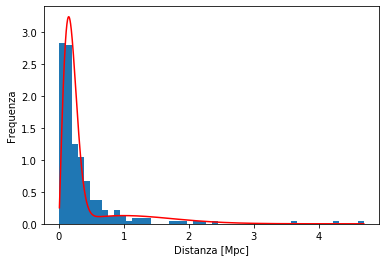

In [34]:
plt.hist(dist_centri,density=True,bins=50)  #density=True mi normalizza l'istogramma
minimo=min(dist_centri)
massimo=max(dist_centri)
print(minimo,massimo)
#def rayleigh(x):
#    return(x/0.05)*math.exp(-(x**2)/(2*0.05))  #rayleigh è 
def rayleigh_plot(x):
    return(P0*x/sigma0*np.exp(-(x**2)/(2*sigma0))+(1-P0)*x/(sigma1)*np.exp(-(x**2)/(2*sigma1))) 
x=np.linspace(minimo,massimo,10000,endpoint=True)
y=rayleigh_plot(x)
plt.plot(x, y, color='red',linestyle='-')
plt.xlabel('Distanza [Mpc]')
plt.ylabel('Frequenza')

In [35]:
from IPython.display import display, Math
parametri=[]

for i in range(ndim):
    mcmc = np.percentile(flat_samples[:, i], [16, 50, 84])
    q = np.diff(mcmc)
    txt = "\mathrm{{{3}}} = {0:.3f}_{{-{1:.3f}}}^{{{2:.3f}}}"
    txt = txt.format(mcmc[1], q[0], q[1], labels[i])
    display(Math(txt))
    parametri.append(mcmc[1])
print(parametri)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

[0.022821504282040668, 0.7898354297726902, 1.0109583122996546]


In [36]:
sigma0_16 = parametri[0]-0.002
sigma0_84 = parametri[0]+0.003
P0_16 = parametri[1]-0.034
P0_84 = parametri[1]+0.029
delta_sigma_16 = parametri[2]-0.158
delta_sigma_84 = parametri[2]+0.2

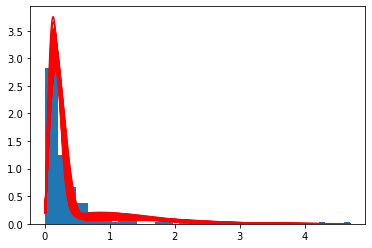

In [46]:
# 100 distribuzioni
from IPython.display import display, Math
sigma0arr=[]
P0arr=[]
delta_sigmaarr=[]

plt.hist(dist_centri,density=True,bins=50) 
minimo=min(dist_centri)
massimo=max(dist_centri)
inds = np.random.randint(len(flat_samples), size=100)
def rayleigh_perc(x):
    sigma1=sigma0+delta_sigma
    return(P0*x/sigma0*np.exp(-(x**2)/(2*sigma0))+(1-P0)*x/(sigma1)*np.exp(-(x**2)/(2*sigma1))) 
for ind in inds:
    sample = flat_samples[ind]
    sigma0 = sample[0]
    sigma0arr.append(sigma0)
    P0 = sample[1]
    P0arr.append(P0)
    delta_sigma = sample[2]
    delta_sigmaarr.append(delta_sigma)
    x=np.linspace(minimo,massimo,10000,endpoint=True)
    y=rayleigh_perc(x)
    plt.plot(x, y, color='red')

In [76]:
#calcolo i percentili per ogni punto con cui è campionato l'asse x

from IPython.display import display, Math
x=np.linspace(minimo,massimo,500,endpoint=True)
j=0
perc16=[]
perc84=[]

while (j<len(x)):
    punti=[]
    i=0
    while (i<len(P0arr)):
        P0=P0arr[i]
        sigma0=sigma0arr[i]
        delta_sigma=delta_sigmaarr[i]
        y=P0*x[j]/sigma0*np.exp(-(x[j]**2)/(2*sigma0))+(1-P0)*x[j]/(sigma1)*np.exp(-(x[j]**2)/(2*sigma1))
        punti.append(y)
        i=i+1
    k=0
    mcmc=[]
    for k in range(ndim):
        mcmc = np.percentile(punti[:], [16, 50, 84])
        q = np.diff(mcmc)
        #txt = "\mathrm{{{3}}} = {0:.3f}_{{-{1:.3f}}}^{{{2:.3f}}}"
        #txt = txt.format(mcmc[1], q[0], q[1], labels[i])
        #display(Math(txt))
    #print(mcmc)
    perc16.append(mcmc[0])
    perc84.append(mcmc[2])
    j=j+1

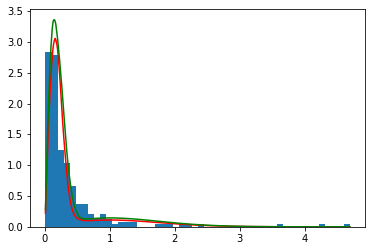

In [81]:
plt.hist(dist_centri,density=True,bins=50) 
x=np.linspace(minimo,massimo,500,endpoint=True)
y16=perc16
y84=perc84
plt.plot(x, y16, color='red')
plt.plot(x, y84, color='green')